In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pingouin as pg 

%matplotlib inline

In [42]:
df = pd.read_csv('Assignment6_Data_Flat.csv')
display(df)

,Unnamed: 0,participant,surroundCentreStr,surroundLambdaPix,centreLambdaPix,surroundOrientationDeg,centreOverSurroundWavelengthRatio,PSEDeg,PSERelativeToSurroundDeg
0,0,Participant 1,12/12,12,12,-20,1.00,-0.96,0.96
1,1,Participant 1,12/12,12,12,20,1.00,0.78,0.78
2,2,Participant 1,48/12,48,12,-20,0.25,0.00,-0.00
3,3,Participant 1,48/12,48,12,20,0.25,0.59,0.59
4,4,Participant 1,12/48,12,48,-20,4.00,-0.43,0.43
...,...,...,...,...,...,...,...,...,...
227,227,Participant 29,48/12,48,12,20,0.25,0.11,0.11
228,228,Participant 29,12/48,12,48,-20,4.00,-0.66,0.66
229,229,Participant 29,12/48,12,48,20,4.00,-0.04,-0.04
230,230,Participant 29,48/48,48,48,-20,1.00,-1.16,1.16


In [81]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 2)

<AxesSubplot:xlabel='surroundOrientationDeg', ylabel='PSEDeg'>

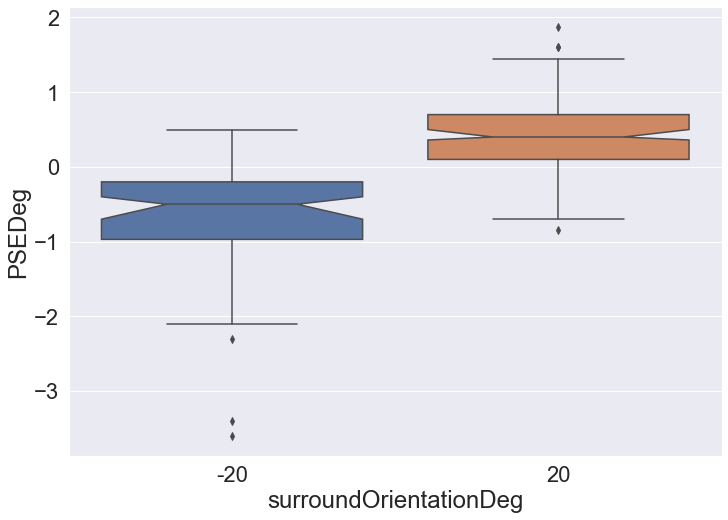

In [87]:
sns.boxplot(x = 'surroundOrientationDeg', 
            y = 'PSEDeg', data = df,
            bootstrap = 10000, notch = True)

<AxesSubplot:xlabel='surroundOrientationDeg', ylabel='PSEDeg'>

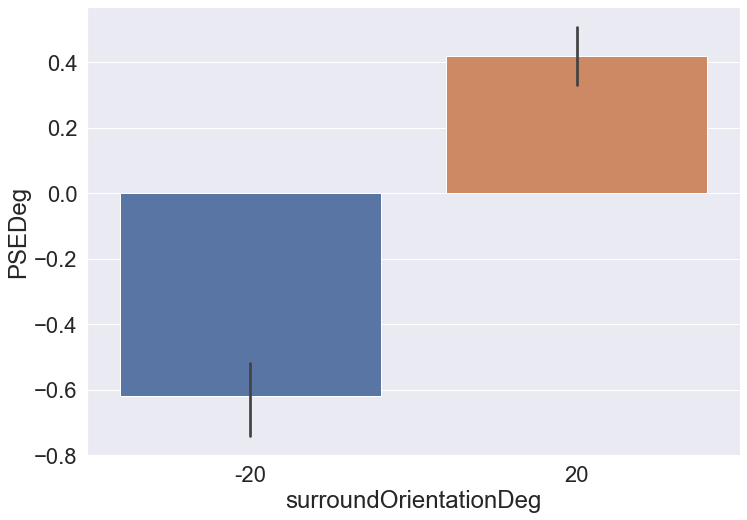

In [88]:
sns.barplot(x = 'surroundOrientationDeg', 
            y = 'PSEDeg', 
            data = df,
            n_boot = 1000)

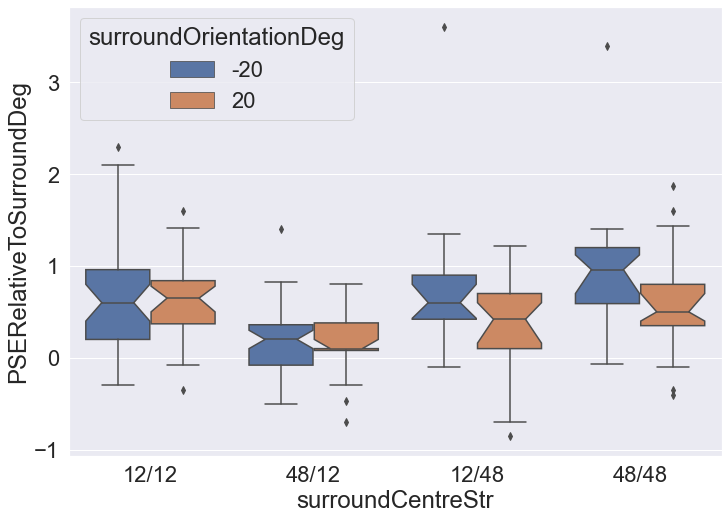

In [83]:
sns.boxplot(x = 'surroundCentreStr',
            hue = 'surroundOrientationDeg',
            y = 'PSERelativeToSurroundDeg',
            data = df, bootstrap = 10000, notch = True)
fig.savefig('BoxPlot.png')

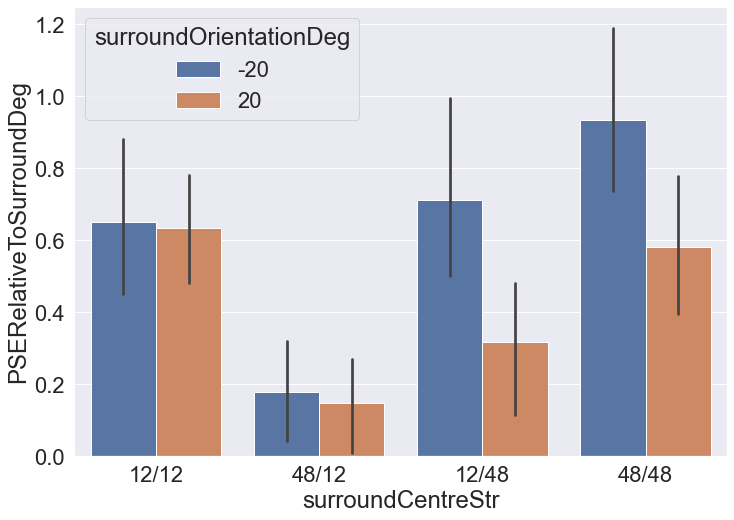

In [84]:
sns.barplot(x = 'surroundCentreStr',
            hue = 'surroundOrientationDeg',
            y = 'PSERelativeToSurroundDeg',
            data = df,
            n_boot = 1000)
fig.savefig('Barplot.png')

<AxesSubplot:xlabel='surroundCentreStr', ylabel='PSERelativeToSurroundDeg'>

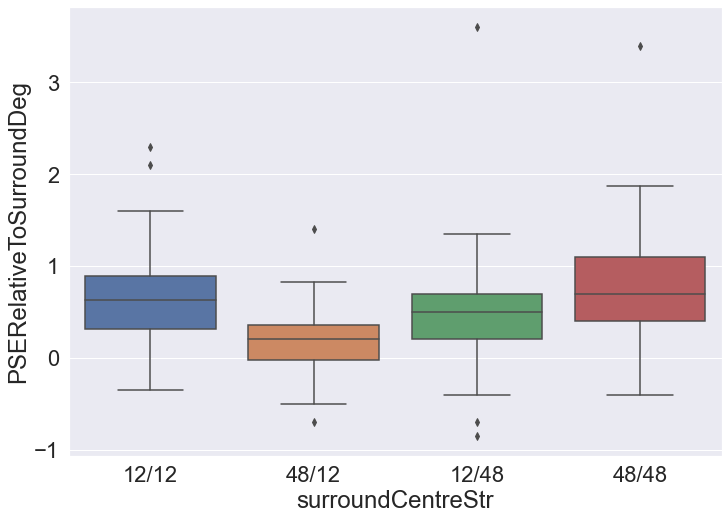

In [85]:
sns.boxplot(x = 'surroundCentreStr',
            y = 'PSERelativeToSurroundDeg',
            data = df)

<AxesSubplot:xlabel='surroundCentreStr', ylabel='PSERelativeToSurroundDeg'>

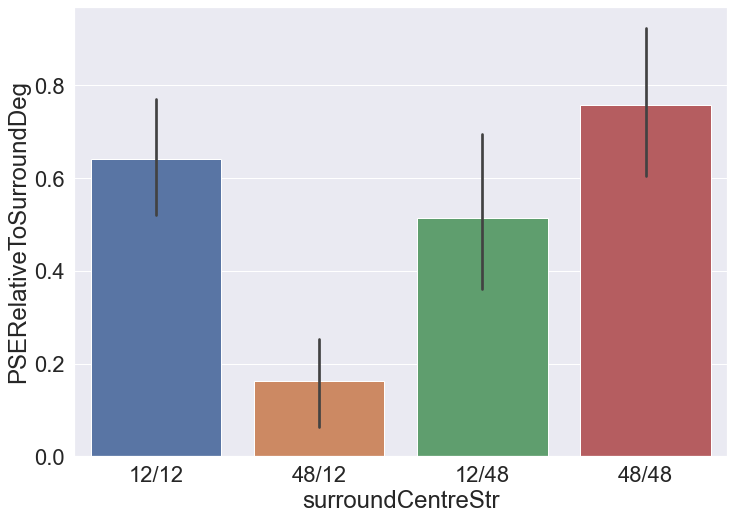

In [86]:
sns.barplot(x = 'surroundCentreStr',
            y = 'PSERelativeToSurroundDeg',
            data = df,
            n_boot = 1000)

In [89]:
pg.rm_anova(dv = 'PSERelativeToSurroundDeg',
            within = ['surroundCentreStr','surroundOrientationDeg'],
            subject = 'participant', data = df)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,surroundCentreStr,11.508850,3,84,3.836283,26.544216,3.580657e-12,4.169062e-10,0.486655,0.793375
1,surroundOrientationDeg,2.274228,1,28,2.274228,3.562869,6.949088e-02,6.949088e-02,0.112882,1.000000
2,surroundCentreStr * surroundOrientationDeg,1.794956,3,84,0.598319,2.341617,7.903318e-02,1.092946e-01,0.077175,0.625478


In [24]:
pg.pairwise_ttests(dv = 'PSERelativeToSurroundDeg',
            within = ['surroundCentreStr','surroundOrientationDeg'],
            subject = 'participant', data = df)

,Contrast,surroundCentreStr,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,surroundCentreStr,-,12/12,12/48,True,True,1.568298,28.0,two-sided,1.280449e-01,0.589,0.363205
1,surroundCentreStr,-,12/12,48/12,True,True,7.891870,28.0,two-sided,1.350920e-08,9.783e+05,1.556976
2,surroundCentreStr,-,12/12,48/48,True,True,-1.319793,28.0,two-sided,1.975936e-01,0.432,-0.320773
3,surroundCentreStr,-,12/48,48/12,True,True,5.450356,28.0,two-sided,8.109284e-06,2571.461,1.321754
4,surroundCentreStr,-,12/48,48/48,True,True,-3.978972,28.0,two-sided,4.445668e-04,68.578,-0.753389
5,surroundCentreStr,-,48/12,48/48,True,True,-9.268157,28.0,two-sided,5.012945e-10,2.172e+07,-2.179752
6,surroundOrientationDeg,-,-20,20,True,True,1.887556,28.0,two-sided,6.949088e-02,0.936,0.558739
7,surroundCentreStr * surroundOrientationDeg,12/12,-20,20,True,True,0.123328,28.0,two-sided,9.027283e-01,0.199,0.030782
8,surroundCentreStr * surroundOrientationDeg,12/48,-20,20,True,True,2.103970,28.0,two-sided,4.448813e-02,1.33,0.655247
9,surroundCentreStr * surroundOrientationDeg,48/12,-20,20,True,True,0.258236,28.0,two-sided,7.981135e-01,0.204,0.079286


In [97]:
pg.rm_anova(dv = 'PSERelativeToSurroundDeg',
            within = ['surroundLambdaPix','centreLambdaPix'],
            subject = 'participant', data = df)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,surroundLambdaPix,0.403914,1,28,0.403914,6.673833,1.529779e-02,1.529779e-02,0.192475,1.0
1,centreLambdaPix,1.572285,1,28,1.572285,14.381413,7.313170e-04,7.313170e-04,0.339333,1.0
2,surroundLambdaPix * centreLambdaPix,3.778226,1,28,3.778226,80.496044,9.972749e-10,9.972749e-10,0.741926,1.0


In [25]:
pg.pairwise_ttests(dv = 'PSERelativeToSurroundDeg',
            within = ['surroundLambdaPix','centreLambdaPix'],
            subject = 'participant', data = df)

,Contrast,surroundLambdaPix,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,surroundLambdaPix,-,12,48,True,True,2.583376,28.0,two-sided,1.529779e-02,3.186,0.485190
1,centreLambdaPix,-,12,48,True,True,-3.792283,28.0,two-sided,7.313170e-04,44.082,-0.869565
2,surroundLambdaPix * centreLambdaPix,12,12,48,True,True,1.568298,28.0,two-sided,1.280449e-01,0.589,0.363205
3,surroundLambdaPix * centreLambdaPix,48,12,48,True,True,-9.268157,28.0,two-sided,5.012945e-10,2.172e+07,-2.179752
